In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

/Users/Belotelov/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

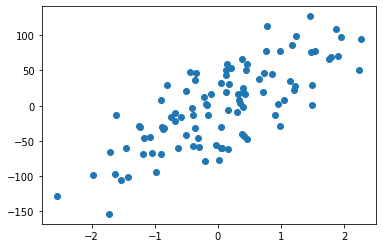

In [3]:
# посмотрим что получилось

pylab.plot(x, y, 'o')
pylab.show()

In [4]:
# размер данных

m, n = np.shape(x)
m, n

(100, 1)

In [5]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [6]:
# y лист значений
y[:5]

array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712,
       -30.8791169 ])

### Сначала вручную

In [9]:
# шаг алгоритма
alpha = 0.01

In [10]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
#         print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

GRADIENT = (X_T * веса) / количество_данных

1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4

1 1 1 1 1 1 1 1 1 1 1 1    0.4
2 2 2 2 2 2 2 2 2 2 2 2    0.334
3 3 3 3 3 3 3 3 3 3 3 3    0.34
4 4 4 4 4 4 4 4 4 4 4 4    0.23


In [11]:
%%time
theta = gradient_descent_2(alpha, x, y, 1000)

CPU times: user 25.5 ms, sys: 2.72 ms, total: 28.3 ms
Wall time: 35.8 ms


In [12]:
theta

array([-2.84837957, 43.20234847])

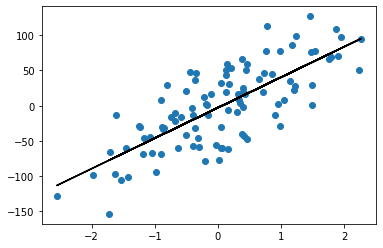

In [13]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
# рисуем результат
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()

In [14]:
from math import exp

# Градиентный спуск логистической регрессии

In [15]:
def gradient_descent_log(alpha, x, y, numIterations):
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] 
    x_transpose = x.transpose() 
    for iter in range( 0, numIterations ):
        hypothesis_0 = np.dot(x, theta) 
        loss = 0
        for val in hypothesis_0:
            hypothesis = 1.0/(1.0+exp((-1)*float(val)))
            loss += ((float(hypothesis) - y))
        J = np.sum(loss ** 2) 
        gradient = (1 / m) * np.dot(x_transpose, loss) 
        theta = theta - alpha * gradient  
    
    return theta

In [16]:
%%time
alpha = 0.000001
theta = gradient_descent_log(alpha, x, y, 10000)

CPU times: user 3.3 s, sys: 12.9 ms, total: 3.32 s
Wall time: 3.33 s


In [17]:
theta

array([ 0.17551658, 44.83871028])

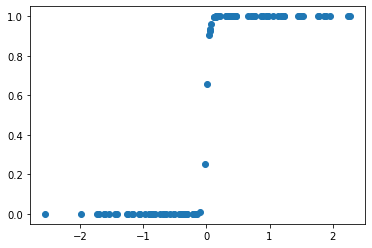

In [18]:
y_predict = []
for i in x: 
    y_predict.append(1/(1+exp(-1*(theta[0] + theta[1]*i[1]))))
pylab.plot(x[:,1],y_predict,'o') 
pylab.show()

In [19]:
y_predict[0], y[0], theta, x[0]

(1.1873359189946674e-07,
 -31.745993948575236,
 array([ 0.17551658, 44.83871028]),
 array([ 1.        , -0.35955316]))

### Используем готовые методы

In [20]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [21]:
model = LogisticRegression()

In [27]:
lab_enc = preprocessing.LabelEncoder()
y_R = lab_enc.fit_transform(y)

In [28]:
model.fit( x, y_R )
predictions = model.predict_proba( x )

In [30]:
model.score(x, y_R)

0.05

Низкая точность

In [25]:
model_R = linear_model.SGDRegressor( alpha = 0.000001, max_iter = 1000 )

In [31]:
model_R.fit( x, y_R )

SGDRegressor(alpha=1e-06, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [34]:
model_R.intercept_, model_R.coef_

(array([24.11284643]), array([24.1126753 , 21.16785965]))

In [35]:
y_predict_sgd = model_R.predict( x )

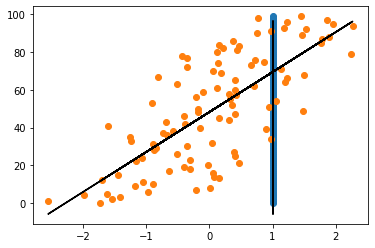

In [37]:
pylab.plot(x, y_R, 'o')
pylab.plot(x, y_predict_sgd, 'k-')
pylab.show()